In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import requests

# 1. Coleta dos dados

Os dados utilizados no primeiro dataset são dados de produção de petróleo e injeção de vapor de um Campo de petróleo no Brasil (Fazenda Pocinho), que estão disponíveis no site da ANP (Agência Nacional de Petróleo).

In [2]:
# Carregando os dados
df = pd.read_csv("Prod.txt", sep ="\t", engine="python", encoding='unicode_escape', decimal=".")

In [3]:
# Visulizando os dados brutos
df

IDENTIFICADOR      ZONA     DATA       vo     Np     vw     Wp   vvi  \
0                NaN       NaN      NaN     [m³]  [Mm³]   [m³]  [Mm³]  [m³]   
1               1FP2  Formação  10-1982  366.400  0.366  0.000  0.000   0.0   
2               1FP2  Formação  11-1982  242.700  0.609  0.000  0.000   0.0   
3               1FP2  Formação  12-1982   99.800  0.709  0.000  0.000   0.0   
4               1FP2  Formação  01-1983   17.100  0.726  0.000  0.000   0.0   
...              ...       ...      ...      ...    ...    ...    ...   ...   
156809       7FP437D  Formação  07-2022    0.000  0.085  0.000  8.583   0.0   
156810       7FP437D  Formação  08-2022    0.000  0.085  0.000  8.583   0.0   
156811       7FP437D  Formação  09-2022    0.000  0.085  0.000  8.583   0.0   
156812       7FP437D  Formação  10-2022    0.000  0.085  0.000  8.583   0.0   
156813       7FP437D  Formação  11-2022    0.000  0.085  0.000  8.583   0.0   

        vvi.1  
0       [Mm³]  
1       0.000  
2       0.000  
3       0.000  
4       0.000  
...       ...  
156809  2.611  
156810  2.611  
156811  2.611  
156812  2.611  
156813  2.611  

[156814 rows x 9 columns]

Conforme mostrado acima, o primeiro dataset original possui aproximadamento 156 mil registros.

O segundo dataset é uma tabela contendo informações de todos os poços do Brasil, extraída diretamente do site da ANP.

In [4]:
import requests

url = "https://www.gov.br/anp/pt-br/assuntos/exploracao-e-producao-de-oleo-e-gas/dados-tecnicos/ad/tabela-de-pocos.xlsx"
s = requests.get(url).content
df2 = pd.read_excel(s, decimal=",")
df2

POCO     CADASTRO      OPERADOR       POCO_OPERADOR ESTADO  \
0          7-GC-12-RN  72100027491  Níon Energia  GALO DE CAMPINA 12     RN   
1          7-GC-13-RN  72100027492  Níon Energia  GALO DE CAMPINA 13     RN   
2           7-GC-8-RN  72100027532  Níon Energia  GALO DE CAMPINA 08     RN   
3          7-ROL-1-RN  72100027454  Níon Energia          ROLINHA 01     RN   
4      3-BRSA-1232-RN  72100027490     Petrobras           3ARG805RN     RN   
...               ...          ...           ...                 ...    ...   
30405    8-LL-49D-RJS  74316027950     Petrobras           8LL49DRJS     RJ   
30406   7-MLL-60D-RJS  74281027933     Petrobras          7MLL60DRJS     RJ   
30407   7-SCR-144D-RN  72100027899      3R Macau          7SCR144DRN     RN   
30408   7-SCR-145D-RN  72100027898      3R Macau          7SCR145DRN     RN   
30409   7-SCR-126D-RN  72100027897      3R Macau          7SCR126DRN     RN   

          BACIA   BLOCO SIG_CAMPO              CAMPO TERRA_MAR  ...  \
0      Potiguar     NaN     GC       GALO DE CAMPINA         T  ...   
1      Potiguar     NaN     GC       GALO DE CAMPINA         T  ...   
2      Potiguar  BTP10B     GC       GALO DE CAMPINA         T  ...   
3      Potiguar     NaN     ROL              ROLINHA         T  ...   
4      Potiguar     NaN     ARG    ALTO DO RODRIGUES         T  ...   
...         ...     ...       ...                ...       ...  ...   
30405    Santos     NaN     TUP                 TUPI         M  ...   
30406    Campos     NaN     MLL         MARLIM LESTE         M  ...   
30407  Potiguar     NaN     SCR       SALINA CRISTAL         T  ...   
30408  Potiguar     NaN     SCR       SALINA CRISTAL         T  ...   
30409  Potiguar     NaN     SCR       SALINA CRISTAL         T  ...   

      DADOS_DIRECIONAIS  TESTE_A_CABO TESTE_DE_FORMACAO CANHONEIO TESTEMUNHO  \
0                   NaN           NaN            Existe       NaN        NaN   
1                   NaN           NaN               NaN       NaN        NaN   
2                   NaN           NaN               NaN    Existe        NaN   
3                   NaN           NaN            Existe    Existe        NaN   
4                   NaN        Existe               NaN       NaN        NaN   
...                 ...           ...               ...       ...        ...   
30405            Existe        Existe               NaN       NaN        NaN   
30406            Existe        Existe               NaN       NaN        NaN   
30407            Existe           NaN               NaN       NaN        NaN   
30408            Existe           NaN               NaN       NaN        NaN   
30409            Existe        Existe               NaN       NaN        NaN   

      GEOQUIMICA SIG_SONDA                   NOM_SONDA ATINGIU_PRESAL  \
0            NaN    ELF-02  SONDA DE PERFURAÇÃO ELF-02              I   
1            NaN    ELF-02  SONDA DE PERFURAÇÃO ELF-02              I   
2            NaN    ELF-02  SONDA DE PERFURAÇÃO ELF-02              I   
3            NaN    ELF-02  SONDA DE PERFURAÇÃO ELF-02              I   
4            NaN     SC-95       SONDA CONVENCIONAL 95              I   
...          ...       ...                         ...            ...   
30405        NaN     SS-83                  ALPHA STAR              S   
30406        NaN     SS-58                  ODN TAY IV              N   
30407        NaN     SC-95       SONDA CONVENCIONAL 95              I   
30408        NaN     SC-95       SONDA CONVENCIONAL 95              I   
30409        NaN     SC-95       SONDA CONVENCIONAL 95              I   

          DHA_ATUALIZACAO  
0     2023-03-12 05:00:05  
1     2023-03-12 05:00:05  
2     2023-03-12 05:00:05  
3     2023-03-12 05:00:05  
4     2023-03-12 05:00:05  
...                   ...  
30405 2023-03-12 05:00:05  
30406 2023-03-12 05:00:05  
30407 2023-03-12 05:00:05  
30408 2023-03-12 05:00:05  
30409 2023-03-12 05:00:05  

[30410 rows x 60 columns]

# 2. Processamento/tratamento dos dados

### Primeiro dataset

In [5]:
# Removendo cluna de zona e renomeando colunas
df = df.drop([0]).drop(columns=["ZONA"])
df = df.rename(columns={"IDENTIFICADOR": "Poço", "DATA": "Data", "vo": "Vo (m³/mês)",
                        "Np": "Np (Mm³)", "vw": "vw (m³/mês)", "Wp": "Wp (Mm³)", "vvi": "Vi (t/mês)", "vvi.1": "Vip (Mt)"})
df               

Poço     Data Vo (m³/mês) Np (Mm³) vw (m³/mês) Wp (Mm³) Vi (t/mês)  \
1          1FP2  10-1982     366.400    0.366       0.000    0.000        0.0   
2          1FP2  11-1982     242.700    0.609       0.000    0.000        0.0   
3          1FP2  12-1982      99.800    0.709       0.000    0.000        0.0   
4          1FP2  01-1983      17.100    0.726       0.000    0.000        0.0   
5          1FP2  02-1983      17.100    0.743       0.000    0.000        0.0   
...         ...      ...         ...      ...         ...      ...        ...   
156809  7FP437D  07-2022       0.000    0.085       0.000    8.583        0.0   
156810  7FP437D  08-2022       0.000    0.085       0.000    8.583        0.0   
156811  7FP437D  09-2022       0.000    0.085       0.000    8.583        0.0   
156812  7FP437D  10-2022       0.000    0.085       0.000    8.583        0.0   
156813  7FP437D  11-2022       0.000    0.085       0.000    8.583        0.0   

       Vip (Mt)  
1         0.000  
2         0.000  
3         0.000  
4         0.000  
5         0.000  
...         ...  
156809    2.611  
156810    2.611  
156811    2.611  
156812    2.611  
156813    2.611  

[156813 rows x 8 columns]

In [6]:
# Convertendo as colunas para valores do tipo numérico
df['Vo (m³/mês)'] = df['Vo (m³/mês)'].astype('float64')
df['Np (Mm³)'] = df['Np (Mm³)'].astype('float64')
df['vw (m³/mês)'] = df['vw (m³/mês)'].astype('float64')
df['Wp (Mm³)'] = df['Wp (Mm³)'].astype('float64')
df['Vi (t/mês)'] = df['Vi (t/mês)'].astype('float64')
df['Vip (Mt)'] = df['Vip (Mt)'].astype('float64')
df['Data'] = pd.to_datetime(df['Data'], format='%m-%Y')
df['Data'] = df['Data'].dt.strftime('%m/%Y')

In [7]:
# Criando a coluna "Ciclo de vapor" e designando zero para o primeiro valor
df["Ciclo de vapor"] = 0
df["Mês/ciclo"] = 0
df["Vi/ciclo (t)"] = 0
df["Vo/ciclo (m³)"] = 0
df["ROV acumulado/ciclo"] = 0

In [8]:
# Calculando coluna com número do ciclo de vapor para cada poço
i = 1
for i in range(len(df)):
    if df.iloc[i, 0] == df.iloc[i-1, 0]:
        if df.iloc[i, 6] > 0:
            if df.iloc[i-1, 6] > 0:
                df.iloc[i, 8] = df.iloc[i-1, 8]
            else:
                df.iloc[i, 8] = df.iloc[i-1, 8] + 1
        else:
            df.iloc[i, 8] = df.iloc[i-1, 8]
    

In [9]:
# Calculando coluna com mês do ciclo de vapor para cada poço
i = 1
for i in range(len(df)):
    if df.iloc[i, 0] == df.iloc[i-1, 0]:
        if df.iloc[i, 6] > 0: # Verifica se vapor injetado no mês é maior que zero, para zerar mês
            0            
        elif df.iloc[i, 8] == 0: # Verifica se ciclo de vapor é zero
            0
        elif df.iloc[i, 2] == 0: # Verifica se produção do mês é zero
            0
        elif df.iloc[i, 2] >= 0 and df.iloc[i-1, 2] == 0:
            0
        elif df.iloc[i, 2] > 0:
            df.iloc[i, 9] = df.iloc[i-1, 9] + 1

In [10]:
# Ajustando para zerar contagem de mês em poços fechados
i = 1
for i in range(len(df)):
    if df.iloc[i, 0] == df.iloc[i-1, 0]:
        if df.iloc[i-1, 9] == 0 and (df.iloc[i-1, 6] == 0):
            if df.iloc[i-2, 6] == 0:
                df.iloc[i, 9] = 0

In [11]:
# Calculando coluna com vapor injetado acumulado em cada ciclo para cada poço
i = 1
for i in range(len(df)):
    if df.iloc[i, 0] == df.iloc[i-1, 0]:
        if df.iloc[i, 6] > 0:
            if df.iloc[i-1, 6] > 0:
                df.iloc[i, 10] = df.iloc[i, 6] + df.iloc[i-1, 10]
            else:
                df.iloc[i, 10] = df.iloc[i, 6]
        else:
            df.iloc[i, 10] = df.iloc[i-1, 10] 

In [12]:
# Calculando coluna com óleo acumulado em cada ciclo para cada poço
i = 1
for i in range(len(df)):
    if df.iloc[i, 0] == df.iloc[i-1, 0]:
        if df.iloc[i, 8] > 0:
            if df.iloc[i, 8] > df.iloc[i-1, 8]:
                df.iloc[i, 11] = df.iloc[i, 2]
            else:
                df.iloc[i, 11] = df.iloc[i, 2] + df.iloc[i-1, 11]
        else:
            df.iloc[i, 11] = 0

In [13]:
# Calculando coluna com ROV acumulado em cada ciclo para cada poço
i = 1
for i in range(len(df)):
    if df.iloc[i, 0] == df.iloc[i-1, 0]:
        if df.iloc[i, 8] > 0:
            df.iloc[i, 12] = df.iloc[i, 11] / df.iloc[i, 10]     

In [14]:
# Selecionando somente dados de poços durante os ciclos de vapor
dfprod = df[(df['Mês/ciclo'] > 0) | (df['Vi (t/mês)'] > 0)]

# Selecionando somente os poços durante os meses com produção
dfprod = dfprod[dfprod['Vo (m³/mês)'] > 0]

In [15]:
# Selecionando somente poços abertos na última data carregada
Open_wells = dfprod[pd.to_datetime(dfprod['Data']) == 
                    max(pd.to_datetime(dfprod.Data))][dfprod['Vo (m³/mês)'] > 0]['Poço'].unique()

dfprod = dfprod[dfprod["Poço"].isin(Open_wells)]

C:\Users\VictorFischer\AppData\Local\Temp\ipykernel_10508\4038856716.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Open_wells = dfprod[pd.to_datetime(dfprod['Data']) ==


### Segundo dataset

In [16]:
# Visualizando as colunas presentes na tabela
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30410 entries, 0 to 30409
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   POCO                        30410 non-null  object        
 1   CADASTRO                    30410 non-null  int64         
 2   OPERADOR                    27482 non-null  object        
 3   POCO_OPERADOR               30410 non-null  object        
 4   ESTADO                      30410 non-null  object        
 5   BACIA                       30410 non-null  object        
 6   BLOCO                       26724 non-null  object        
 7   SIG_CAMPO                   26338 non-null  object        
 8   CAMPO                       26338 non-null  object        
 9   TERRA_MAR                   30410 non-null  object        
 10  POCO_POS_ANP                30410 non-null  object        
 11  TIPO                        30410 non-null  int64     

Serão utilizados desta tabela somente as colunas com o nome do poço e as coordenadas

In [17]:
# Filtrando a tabela para conter somente os poços do campo de interesse (Fazenda Pocinho)
df2 = df2[df2['CAMPO']=='FAZENDA POCINHO']

In [18]:
# Selecionando somente as colunas com o nome do poço e coordenadas e renomeando as colunas
df2 = df2[["POCO", "LATITUDE_BASE_DD", 'LONGITUDE_BASE_DD']].reset_index(drop=True)
df2 = df2.rename(columns={"POCO": "Poço", "LATITUDE_BASE_DD": "Latitude", "LONGITUDE_BASE_DD": "Longitude"})


# Visualizando os dados
df2

Poço  Latitude  Longitude
0     7-FP-271-RN -5.246995 -36.538581
1     7-FP-262-RN -5.226779 -36.488356
2    7-FP-260H-RN -5.236707 -36.509549
3     7-FP-265-RN -5.243329 -36.533891
4     7-FP-263-RN -5.228726 -36.490288
..            ...       ...        ...
553  7-FP-449D-RN -5.254792 -36.557412
554  7-FP-446D-RN -5.244404 -36.531641
555  7-FP-452D-RN -5.255961 -36.554811
556   7-FP-429-RN -5.244064 -36.530601
557  7-FP-432D-RN -5.241430 -36.526283

[558 rows x 3 columns]

In [19]:
# Para que seja possível juntar os dois datasets, é preciso renomear os poços de modo que fique igual ao que está no 
# primeiro dataset, excluíndo os hífens e os dois últimos dígitos, que reprensentam o estado (RN)
df2['Poço'] = df2['Poço'].str.replace('-','')
df2['Poço'] = df2['Poço'].apply(lambda x: x[:-2])

In [20]:
# Visualizando os dados
df2

Poço  Latitude  Longitude
0     7FP271 -5.246995 -36.538581
1     7FP262 -5.226779 -36.488356
2    7FP260H -5.236707 -36.509549
3     7FP265 -5.243329 -36.533891
4     7FP263 -5.228726 -36.490288
..       ...       ...        ...
553  7FP449D -5.254792 -36.557412
554  7FP446D -5.244404 -36.531641
555  7FP452D -5.255961 -36.554811
556   7FP429 -5.244064 -36.530601
557  7FP432D -5.241430 -36.526283

[558 rows x 3 columns]

In [21]:
# Unindo os dois datasets
df_full = pd.merge(dfprod, df2, how="left", on=["Poço", "Poço"])
df_full

Poço     Data  Vo (m³/mês)  Np (Mm³)  vw (m³/mês)  Wp (Mm³)  \
0         1FP2  08/2008        3.230     7.001        0.310    35.170   
1         1FP2  09/2008      143.440     7.144       21.510    35.191   
2         1FP2  10/2008      155.440     7.300       16.540    35.208   
3         1FP2  11/2008      123.950     7.424        8.740    35.217   
4         1FP2  12/2008       99.150     7.523        8.110    35.225   
...        ...      ...          ...       ...          ...       ...   
19157  7FP448D  07/2022        8.896     4.001      942.981    60.158   
19158  7FP448D  08/2022       19.908     4.021      963.138    61.121   
19159  7FP448D  09/2022       11.443     4.033      621.727    61.743   
19160  7FP448D  10/2022        9.667     4.042     1067.951    62.811   
19161  7FP448D  11/2022        8.102     4.050      835.688    63.646   

       Vi (t/mês)  Vip (Mt)  Ciclo de vapor  Mês/ciclo  Vi/ciclo (t)  \
0          1199.9     1.200               1          0        1199.9   
1             0.0     1.200               1          1        1199.9   
2             0.0     1.200               1          2        1199.9   
3             0.0     1.200               1          3        1199.9   
4             0.0     1.200               1          4        1199.9   
...           ...       ...             ...        ...           ...   
19157         0.0     1.729               1         70        1728.8   
19158         0.0     1.729               1         71        1728.8   
19159         0.0     1.729               1         72        1728.8   
19160         0.0     1.729               1         73        1728.8   
19161         0.0     1.729               1         74        1728.8   

       Vo/ciclo (m³)  ROV acumulado/ciclo  Latitude  Longitude  
0              3.230             0.002692 -5.245875 -36.531490  
1            146.670             0.122235 -5.245875 -36.531490  
2            302.110             0.251779 -5.245875 -36.531490  
3            426.060             0.355080 -5.245875 -36.531490  
4            525.210             0.437711 -5.245875 -36.531490  
...              ...                  ...       ...        ...  
19157       3377.317             1.953561 -5.255206 -36.558396  
19158       3397.225             1.965077 -5.255206 -36.558396  
19159       3408.668             1.971696 -5.255206 -36.558396  
19160       3418.335             1.977288 -5.255206 -36.558396  
19161       3426.437             1.981974 -5.255206 -36.558396  

[19162 rows x 15 columns]

Como visto acima, o dataset final tem 19162 linhas e 15 colunas

In [22]:
# Verificando se há dados nulos
df_full.isnull().sum()

Poço                   0
Data                   0
Vo (m³/mês)            0
Np (Mm³)               0
vw (m³/mês)            0
Wp (Mm³)               0
Vi (t/mês)             0
Vip (Mt)               0
Ciclo de vapor         0
Mês/ciclo              0
Vi/ciclo (t)           0
Vo/ciclo (m³)          0
ROV acumulado/ciclo    0
Latitude               0
Longitude              0
dtype: int64

# 3. Análise e exploração dos dados

Visualizando um resumo estatístico dos dados

In [23]:
df_full.describe()

Vo (m³/mês)      Np (Mm³)   vw (m³/mês)      Wp (Mm³)    Vi (t/mês)  \
count  19162.000000  19162.000000  19162.000000  19162.000000  19162.000000   
mean      45.277008     13.196145   1053.889876    119.558078     31.957577   
std       46.895223     16.029081    763.601105    105.775704    191.546575   
min        0.001000      0.013000      0.000000      0.035000      0.000000   
25%       14.440000      3.197000    442.393750     34.767250      0.000000   
50%       31.778500      7.422500    953.189000     86.805000      0.000000   
75%       60.100000     16.791750   1491.063000    182.905250      0.000000   
max      576.030000    105.904000   5407.761000    533.965000   2920.300000   

           Vip (Mt)  Ciclo de vapor     Mês/ciclo  Vi/ciclo (t)  \
count  19162.000000    19162.000000  19162.000000  19162.000000   
mean       3.301141        2.689855     29.912692   1278.334015   
std        1.997416        1.574678     31.899401    526.061665   
min        0.010000        1.000000      0.000000     10.200000   
25%        1.695000        1.000000      8.000000    914.700000   
50%        2.849000        2.000000     19.000000   1240.300000   
75%        4.563000        4.000000     40.000000   1606.000000   
max       10.976000        9.000000    233.000000   2939.700000   

       Vo/ciclo (m³)  ROV acumulado/ciclo      Latitude     Longitude  
count   19162.000000         1.916200e+04  19162.000000  19162.000000  
mean     1512.155551         1.622459e+00     -5.254603    -36.555310  
std      1945.750525         3.563728e+00      0.011336      0.027090  
min         0.001000         3.703018e-07     -5.275124    -36.611243  
25%       291.875500         2.303396e-01     -5.263266    -36.571324  
50%       829.059500         6.884464e-01     -5.254874    -36.555079  
75%      1919.572750         1.679429e+00     -5.246787    -36.536161  
max     15266.132000         5.385497e+01     -5.218722    -36.475022

In [24]:
# Estatística dos número de ciclos de vapor
import plotly.express as px
fig = px.box(df_full.groupby(["Poço"]).max(), y="Ciclo de vapor")
fig.show()

print("Estatísticas dos números de ciclos de vapor para todo o campo")
df_full.groupby(["Poço"]).max()["Ciclo de vapor"].describe()

Estatísticas dos números de ciclos de vapor para todo o campo


count    143.000000
mean       3.902098
std        1.828240
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        9.000000
Name: Ciclo de vapor, dtype: float64

In [25]:
# Estatísticas do volume máximo injetado por ciclo de vapor para todo o campo
fig = px.box(df_full.groupby(['Poço', 'Ciclo de vapor']).max(), y="Vi/ciclo (t)")
fig.show()

print("Estatísticas do volume máximo injetado por ciclo de vapor para todo o campo")
df_full.groupby(['Poço', 'Ciclo de vapor']).max()["Vi/ciclo (t)"].describe()

Estatísticas do volume máximo injetado por ciclo de vapor para todo o campo


count     557.000000
mean     1259.698923
std       507.632305
min        31.000000
25%       914.800000
50%      1246.600000
75%      1568.100000
max      2939.700000
Name: Vi/ciclo (t), dtype: float64

In [26]:
# Histrograma de frequência do vapor injetado por ciclo
fig = px.histogram(df_full, x="Vi/ciclo (t)")
fig.show()

In [27]:
# Histrograma de frequência da produção de óleo mensal
fig = px.histogram(df_full, x="Vo (m³/mês)")
fig.show()

In [28]:
# Verificando a correlação entre o volume de óleo produzido e o ciclo atual de vapor
df_full['Vo/ciclo (m³)'].corr(df_full['Ciclo de vapor'])

-0.2269209696813102

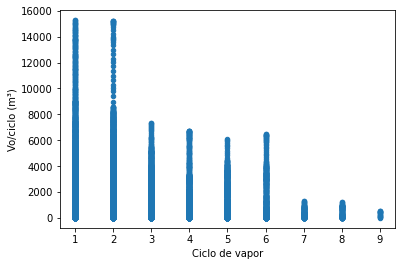

In [29]:
df_full.plot(x='Ciclo de vapor', y='Vo/ciclo (m³)', kind='scatter');

Apesar de não apresentar forte correlação negativa (22%), é possível visualizar pelo gráfico acima que a injeção de vapor tende a produzir menos efeito na produção de óleo conforme o número de ciclos no mesmo poço aumenta, conforme já é conhecido na literatura especializada.

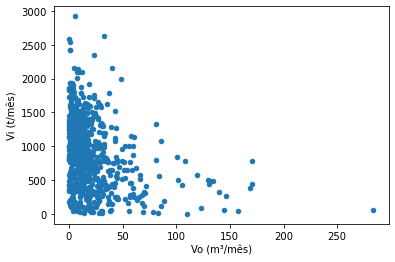

In [30]:
# Visualizando a correlação entre o vapor injetado e óleo produzido somente em meses com injeção de vapor
df_full[df_full['Vi (t/mês)'] > 0].plot(x='Vo (m³/mês)', y='Vi (t/mês)', kind='scatter');

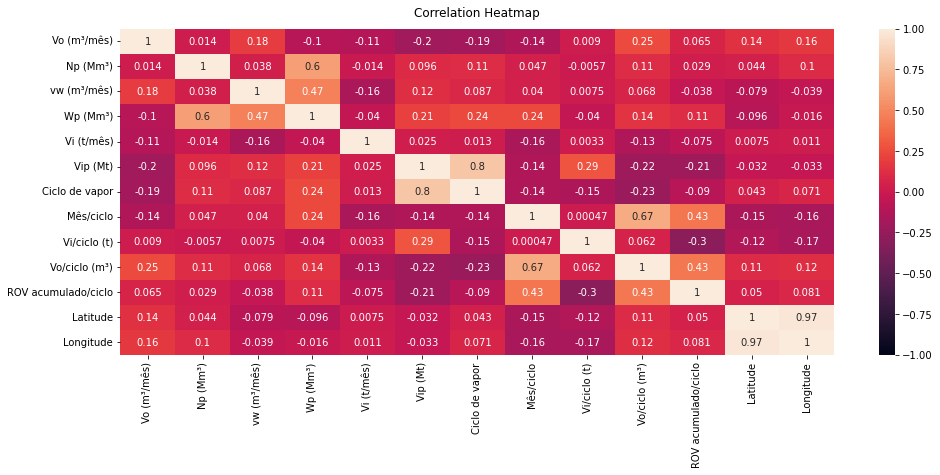

In [31]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_full.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [32]:
well = "1FP2"

df_full[df_full['Poço'] == well]

fig = px.line(df_full[df_full['Poço'] == well], x="Mês/ciclo", y="ROV acumulado/ciclo", color="Ciclo de vapor",
              title="ROV acumulado por ciclo - " + well, markers = True)
fig.update_layout(
    width=600,
    height=350,
    autosize=False,
    margin=dict(t=30, b=0, l=0, r=0),
)
fig.show()

fig2 = px.line(df_full[df_full['Poço'] == well], x="Data", y="ROV acumulado/ciclo",
               title="ROV acumulado por ciclo no tempo - " + well, markers = True)
fig2.update_layout(
    width=600,
    height=350,
    autosize=False,
    margin=dict(t=30, b=0, l=0, r=0),
)
fig2.show()

fig3 = px.line(df_full[df_full['Poço'] == well], x="Data", y="Vo (m³/mês)", color="Ciclo de vapor",
               title="Produção mensal - " + well )
fig3.update_layout(
    width=600,
    height=350,
    autosize=False,
    margin=dict(t=30, b=0, l=0, r=0),
)
fig3.show()

fig4 = px.line(df_full[df_full['Poço'] == well], x="Data", y="Np (Mm³)", color="Ciclo de vapor",
               title="Produção acumulada - " + well )
fig4.update_layout(
    width=600,
    height=350,
    autosize=False,
    margin=dict(t=30, b=0, l=0, r=0),
)
fig4.show()

fig5 = px.line(df_full[df_full['Poço'] == well], x="Data", y="Vi (t/mês)", color="Ciclo de vapor",
               title="Vapor injetado - " + well, markers = True )
fig5.update_layout(
    width=600,
    height=350,
    autosize=False,
    margin=dict(t=30, b=0, l=0, r=0),
)
fig5.show()

df_full[df_full['Poço'] == well].groupby(['Ciclo de vapor']).max()[['Poço', 'Data', 'Mês/ciclo',
                                                                    'Vi/ciclo (t)', 'Vo/ciclo (m³)', 'ROV acumulado/ciclo']]

Poço     Data  Mês/ciclo  Vi/ciclo (t)  Vo/ciclo (m³)  \
Ciclo de vapor                                                          
1               1FP2  12/2011         51        1199.9       2308.394   
2               1FP2  12/2013         13        1253.0        519.239   
3               1FP2  12/2015         27        1156.4        571.591   
4               1FP2  12/2019         50        1201.8       1316.148   
5               1FP2  12/2021         25        1093.6        358.817   

                ROV acumulado/ciclo  
Ciclo de vapor                       
1                          1.923822  
2                          0.414397  
3                          0.494285  
4                          1.095147  
5                          0.328106

# 5. Criação do modelo de Machine Learning

Como deseja-se ajustar um modelo que faça previsão da produção de óleo para cada poço de acordo com a injeção de vapor, não foi possível utilizar métodos de ML convencionais para análise de séries temporais, pelo fato de que os mesmos levam em consideração apenas a própria variável target no modelo, utilizando valores passados para prever os valores futuros.

Neste trabalho, a análise de uma série temporal foi tratada como um problema de regressão, utilizando a técninca Auto-Regressive Distributed Lag, onde é possível utilizar outras variáveis no tempo passado, além da própria variável target, para prever a variável target no tempo futuro. Deste modo, é possível utilizar algoritmos tradicionais de regressão para resolver o problema, portanto foram testados aqui o Random Forest Regressor e o Ridge Regressor. Optou-se por utilizar as variáveis de injeção de vapor e número do ciclo, além da própria variável target (produção de óleo).

## Auto-Regressive Distributed Lag

In [33]:
def time_delay_embedding(series: pd.Series, n_lags: int, horizon: int):
    """
    Time delay embedding
    Time series for supervised learning
    :param series: time series as pd.Series
    :param n_lags: number of past values to used as explanatory variables
    :param horizon: how many values to forecast
    :return: pd.DataFrame with reconstructed time series
    """
    assert isinstance(series, pd.Series)

    if series.name is None:
        name = 'Series'
    else:
        name = series.name

    n_lags_iter = list(range(n_lags, -horizon, -1))

    X = [series.shift(i) for i in n_lags_iter]
    X = pd.concat(X, axis=1).dropna()
    X.columns = [f'{name}(t-{j - 1})'
                 if j > 0 else f'{name}(t+{np.abs(j) + 1})'
                 for j in n_lags_iter]

    return X

In [34]:
# Para visualizar um exemplo do ajuste obtido, foi utlizado o poço 1FP2
well = "1FP2"

df_ARDL = df_full[df_full['Poço'] == well].reset_index()

df_ARDL = df_ARDL[['Data', 'Vo (m³/mês)', 'Vi (t/mês)', 'Ciclo de vapor']]

df_ARDL = df_ARDL.rename(columns={"Vo (m³/mês)": "Vo"})

df_ARDL.set_index('Data', inplace=True)

In [35]:
# Foram utilizados 4 valores passados das variáveis para previsão da variável target
n_lags = 4

df_ARDL_delay = []
for col in df_ARDL:
    col_df = time_delay_embedding(df_ARDL[col], n_lags=n_lags, horizon=1)
    df_ARDL_delay.append(col_df)

In [36]:
# concatenando todas as variáveis
df_ARDL_concat = pd.concat(df_ARDL_delay, axis=1).dropna()

## Modelo 1 - Random Forest

Para manter o comportamento esperado em cada ciclo de injeção de vapor, optou-se por utilizar como dados de treino a produção do poço durante todos os ciclos de vapor, com exceção do último ciclo, que foi utilizado como dado de teste. No caso do 1FP2, por exemplo, o poço já foi submetido a 5 ciclos de vapor, portanto, os 4 primeiros ciclos são classificados como dados de treino, e o quinto ciclo é classificado como dado de teste.

### Ajuste do modelo para 1 poço

In [37]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor

# train/test split
# Selecionando para treino dados onde o ciclo de vapor é diferente do maior ciclo
train = df_ARDL_concat[df_ARDL_concat['Ciclo de vapor(t+1)'] != df_ARDL_concat['Ciclo de vapor(t+1)'].max()]

# Selecionando para teste dados onde o ciclo de vapor é o maior ciclo
test = df_ARDL_concat[df_ARDL_concat['Ciclo de vapor(t+1)'] == df_ARDL_concat['Ciclo de vapor(t+1)'].max()]

predictor_variables = df_ARDL_concat.columns.str.contains('\(t\-')
target_variables = df_ARDL_concat.columns.str.contains('Vo\(t\+')

X_tr = train.iloc[:, predictor_variables]
y_tr = train.iloc[:, target_variables]

X_ts = test.iloc[:, predictor_variables]
y_ts = test.iloc[:, target_variables]

# fitting a RF model
model = RandomForestRegressor(n_estimators=8, random_state = 50) # Random Forest

model.fit(X_tr, y_tr)

# fazendo previsão para os dados de teste
preds = model.predict(X_ts)

# computando o MAE
print('Mean Average Error: {:0.3f}.'.format(mae(y_ts, preds).round(3)))
# computando o RMSE
print('Root Mean Average Squared Error = {:0.3f}.'.format(mse(y_ts, preds, squared=False).round(3)))

Mean Average Error: 9.248.
Root Mean Average Squared Error = 15.924.


C:\Users\VictorFischer\AppData\Local\Temp\ipykernel_10508\635019426.py:24: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



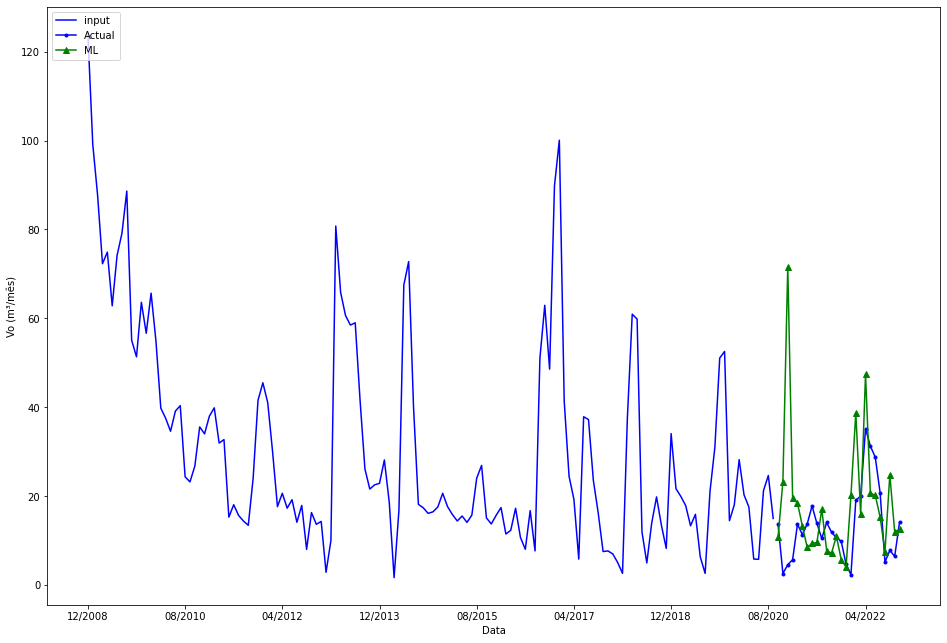

In [38]:
# visualizando graficamente o resultado
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(X_tr['Vo(t-0)'], 'b-', label='input')
ax.plot(X_ts['Vo(t-0)'], marker='.', color='blue', label='Actual')
ax.plot(X_ts.index, pd.DataFrame(preds)[0], marker='^', color='green', label='ML')
loc = plticker.MultipleLocator(base=20)
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Data')
ax.set_ylabel('Vo (m³/mês)')
plt.legend(loc=2);

## Ajuste de hiperparâmetros

Por questões de tempo e esforço computacional, o ajuste de hiperparâmetros foi realizado apenas para 1 poço (1FP2), e os melhores parâmetros replicados para todos os poços. Idealmente, o ajuste deveria ser feito para todos os poços dentro de um loop, como o que é usado para fazer as previsões.

In [39]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2,
                               random_state=50, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_tr, y_tr)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


C:\Users\VictorFischer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300, 1400, 1500, 1600,
                                                         1700, 1800, 1900,
       

In [41]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [42]:
def evaluate(model, test_features, test_labels):
    preds = model.predict(test_features)
    print('Model Performance')
    print('Mean Average Error: {:0.3f}.'.format(mae(y_ts, preds).round(3)))
    print('Root Mean Average Squared Error = {:0.3f}.'.format(mse(y_ts, preds, squared=False).round(3)))
    
base_model = RandomForestRegressor(n_estimators = 8, random_state = 50)
base_model.fit(X_tr, y_tr)
base_accuracy = evaluate(base_model, X_ts, y_ts)

Model Performance
Mean Average Error: 9.248.
Root Mean Average Squared Error = 15.924.


C:\Users\VictorFischer\AppData\Local\Temp\ipykernel_10508\1774483462.py:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [43]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_ts, y_ts)

Model Performance
Mean Average Error: 8.325.
Root Mean Average Squared Error = 13.143.


### Previsão para 1 poço

In [44]:
X_prev = X_ts.copy()

In [45]:
# Criando data set para fazer previsões

preds_test = np.copy(preds)

X_previsao = pd.DataFrame(data = [], columns = X_prev.columns)

# Novo ciclo - Foi utilizado como padrão para o próximo ciclo (previsão) um volume de injeção de vapor
# médio no campo, de 1300 t. 
volume_inj = 1300
Ciclo_novo = df_ARDL_concat['Ciclo de vapor(t+1)'].max() + 1
meses = 10

## Primeiro mês de previsão -----------

i = 0

#for i in range(n_lags):
dic = pd.DataFrame({'Vo(t-3)': [X_ts.iloc[-1, i+1]], 'Vo(t-2)': [X_ts.iloc[-1, i+2]],
                        'Vo(t-1)': [X_ts.iloc[-1, i+3]], 'Vo(t-0)': [pd.DataFrame(preds_test).iloc[-1, 0]],
                        'Vi (t/mês)(t-3)': [X_ts.iloc[-1, i+5]], 'Vi (t/mês)(t-2)': [X_ts.iloc[-1, i+6]],
                        'Vi (t/mês)(t-1)': [X_ts.iloc[-1, i+7]], 'Vi (t/mês)(t-0)': ['0'],
                        'Ciclo de vapor(t-3)': [X_ts.iloc[-1, i+9]], 'Ciclo de vapor(t-2)': [X_ts.iloc[-1, i+10]],
                        'Ciclo de vapor(t-1)': [X_ts.iloc[-1, i+11]], 'Ciclo de vapor(t-0)': [df_ARDL_concat['Ciclo de vapor(t+1)'].max()]})

dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=i+1)
dic.set_index(['Data'], inplace=True)

X_previsao2 = pd.concat([X_previsao, dic], ignore_index = False, axis = 0)

preds_new = best_random.predict(X_previsao2)

## Segundo mês de previsão -----------

i = i+1

#for i in range(n_lags):
dic = pd.DataFrame({'Vo(t-3)': [X_previsao2.iloc[-1, i]], 'Vo(t-2)': [X_previsao2.iloc[-1, i+1]],
                        'Vo(t-1)': [X_previsao2.iloc[-1, i+2]], 'Vo(t-0)': [preds_new[-i+1]],
                        'Vi (t/mês)(t-3)': [X_previsao2.iloc[-1, i+4]], 'Vi (t/mês)(t-2)': [X_previsao2.iloc[-1, i+5]],
                        'Vi (t/mês)(t-1)': [X_previsao2.iloc[-1, i+6]], 'Vi (t/mês)(t-0)': [volume_inj],
                        'Ciclo de vapor(t-3)': [X_previsao2.iloc[-1, i+8]], 'Ciclo de vapor(t-2)': [X_previsao2.iloc[-1, i+9]],
                        'Ciclo de vapor(t-1)': [X_previsao2.iloc[-1, i+10]], 'Ciclo de vapor(t-0)': [Ciclo_novo]})

dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=i+1)
dic.set_index(['Data'], inplace=True)

X_previsao2 = pd.concat([X_previsao2, dic], ignore_index = False, axis = 0)

preds_new = best_random.predict(X_previsao2)

preds_test = np.append([preds_test], [preds_new])

## Terceiro mês de previsão em diante -----------

k = 1
m = 1

while m <= meses:
    dic = pd.DataFrame({'Vo(t-3)': [X_previsao2.iloc[-1, k]], 'Vo(t-2)': [X_previsao2.iloc[-1, k+1]],
                            'Vo(t-1)': [X_previsao2.iloc[-1, k+2]], 'Vo(t-0)': [preds_new[-k]],
                            'Vi (t/mês)(t-3)': [X_previsao2.iloc[-1, k+4]], 'Vi (t/mês)(t-2)': [X_previsao2.iloc[-1, k+5]],
                            'Vi (t/mês)(t-1)': [X_previsao2.iloc[-1, k+6]], 'Vi (t/mês)(t-0)': ['0'],
                            'Ciclo de vapor(t-3)': [X_previsao2.iloc[-1, k+8]], 'Ciclo de vapor(t-2)': [X_previsao2.iloc[-1, k+9]],
                            'Ciclo de vapor(t-1)': [X_previsao2.iloc[-1, k+10]], 'Ciclo de vapor(t-0)': [Ciclo_novo]})

    dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=m+2)
    dic.set_index(['Data'], inplace=True)

    X_previsao2 = pd.concat([X_previsao2, dic], ignore_index = False, axis = 0)

    preds_new = best_random.predict(X_previsao2)

    preds_test = np.append([preds_test], [preds_new])
    
    m += 1


X_previsao2.index = pd.to_datetime(X_previsao2.index, format='%m/%Y').strftime('%m/%Y')
X_previsao2['Previsto'] = pd.DataFrame(preds_new, index = X_previsao2.index)

Total de óleo previsto em 1 ano de ciclo 420.503163451658 m³


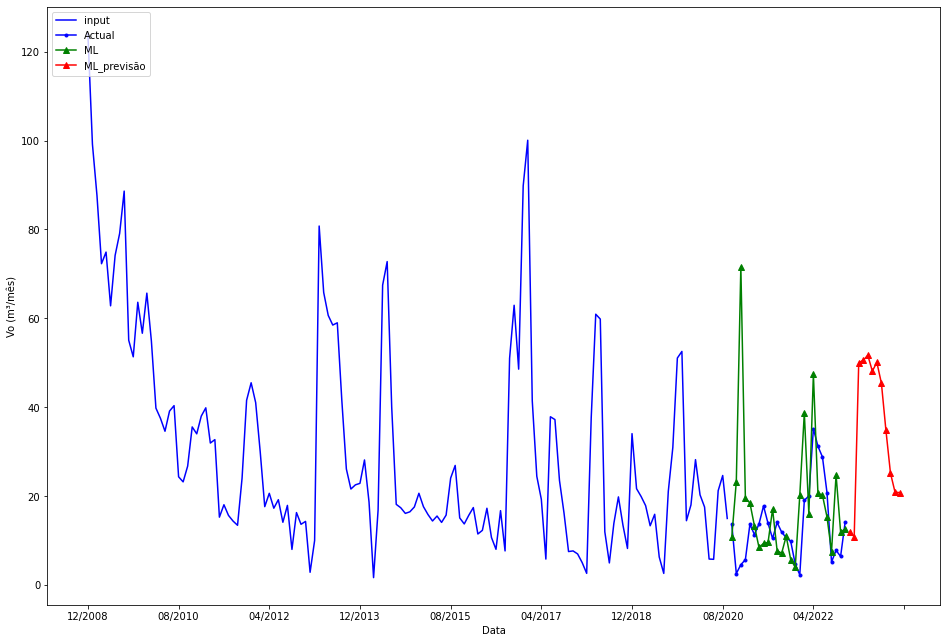

In [46]:
import matplotlib.ticker as plticker


fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(X_tr['Vo(t-0)'], 'b-', label='input')
ax.plot(X_ts['Vo(t-0)'], marker='.', color='blue', label='Actual')
#ax.plot(train['Data'], X_ts, marker='.', color='blue', label='Actual')
#ax.plot(X_test[5], marker='o', color='red', label='Baseline')
ax.plot(X_ts.index, pd.DataFrame(preds)[0], marker='^', color='green', label='ML')
ax.plot(X_previsao2.index, X_previsao2['Previsto'], marker='^', color='red', label='ML_previsão')

#ax.plot(X_ts.index, pd.DataFrame(preds_topf)[0], marker='^', color='green', label='ML')
#ax.plot(np.arange(26, 52, 1), gbr_seq_preds[1], marker='P', color='black', label='Gradient Boosting')
loc = plticker.MultipleLocator(base=20)
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Data')
ax.set_ylabel('Vo (m³/mês)')
plt.legend(loc=2);
#fig.autofmt_xdate()
#plt.tight_layout()

print('Total de óleo previsto em 1 ano de ciclo', X_previsao2['Previsto'].sum(), 'm³')

## Ajuste e previsão para todos os poços abertos (Random Forest)

In [47]:
# Selecionando somente poços abertos na última data carregada
Open_wells = dfprod[pd.to_datetime(dfprod['Data']) ==
                    max(pd.to_datetime(dfprod.Data))][dfprod['Vo (m³/mês)'] > 0]['Poço'].unique()

df_open = dfprod[dfprod["Poço"].isin(Open_wells)]

C:\Users\VictorFischer\AppData\Local\Temp\ipykernel_10508\1948295939.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



##### Visualizando o ciclo atual de cada poço

In [48]:
df_res_atual = pd.DataFrame(data = [])

for w in df_open['Poço'].unique():
    dft = df_open[(df_open['Poço']==w)]
    
    dic = pd.DataFrame({'Poço': w, 'ROV atual': round(dft[dft['Ciclo de vapor']==dft['Ciclo de vapor'].max()]['ROV acumulado/ciclo'].max(), 3),
                        'Ciclo atual': dft['Ciclo de vapor'].max(),
                        'Meses do ciclo atual': dft[dft['Ciclo de vapor']==dft['Ciclo de vapor'].max()]['Mês/ciclo'].max(),
                        'Volume de óleo atual (m³/mês)': dft[pd.to_datetime(dft['Data']) == max(pd.to_datetime(dft.Data))]['Vo (m³/mês)'].values,
                       'Última cota injetada (t)': dft[dft['Ciclo de vapor']==dft['Ciclo de vapor'].max()]['Vi/ciclo (t)'].max()}
                      )
    
    df_res_atual = pd.concat([df_res_atual, dic], ignore_index = True, axis = 0)
    
df_res_atual

Poço  ROV atual  Ciclo atual  Meses do ciclo atual  \
0       1FP2      0.328            5                    25   
1       1FP3      1.540            5                    31   
2       4FP5      1.192            6                    38   
3      7FP12      1.390            2                    51   
4     7FP139      9.030            2                   233   
..       ...        ...          ...                   ...   
138  7FP443D      0.171            3                    12   
139  7FP464D      0.074            3                     7   
140  7FP441D      1.755            2                    45   
141   7FP469      0.556            5                    27   
142  7FP448D      1.982            1                    74   

     Volume de óleo atual (m³/mês)  Última cota injetada (t)  
0                           22.578                    1093.6  
1                           16.295                     652.7  
2                           11.392                    1420.0  
3                            9.043                    1819.3  
4                            6.816                     759.0  
..                             ...                       ...  
138                        158.168                    1822.5  
139                          3.707                     370.8  
140                         18.078                    1262.9  
141                         12.103                     961.5  
142                          8.102                    1728.8  

[143 rows x 6 columns]

### Poços com somente 1 ciclo de vapor até o momento: 
#### (não podem ser utilizados no modelo por insuficiência de dados para treino e teste)

In [49]:
df_res_atual[df_res_atual['Ciclo atual']==1]

Poço  ROV atual  Ciclo atual  Meses do ciclo atual  \
18     7FP22      1.311            1                    20   
53    7FP333      7.353            1                   172   
77    7FP384      0.850            1                   150   
81    7FP389      1.318            1                   146   
92    7FP411      6.151            1                   129   
111  7FP449D      0.583            1                    61   
114   7FP454      1.057            1                    27   
120   7FP468      2.656            1                    63   
122   7FP476      1.287            1                    72   
123   7FP479      0.558            1                    73   
124   7FP481      1.042            1                    72   
127   7FP485      0.482            1                    71   
142  7FP448D      1.982            1                    74   

     Volume de óleo atual (m³/mês)  Última cota injetada (t)  
18                          32.993                     326.2  
53                          22.541                    1045.2  
77                           2.789                    1705.5  
81                          14.735                    2321.1  
92                          89.356                    2479.2  
111                          2.624                    1345.3  
114                         25.746                     914.8  
120                          5.322                    1082.9  
122                         37.263                    1297.1  
123                         31.234                    1690.2  
124                         15.342                    1961.2  
127                         12.370                    1314.6  
142                          8.102                    1728.8

In [50]:
import warnings
warnings.filterwarnings("ignore")

df_sem_dados = pd.DataFrame(data = [])
df_open_min_ciclos = df_open[df_open["Poço"].isin(df_res_atual[df_res_atual['Ciclo atual']>1].Poço)]
X_previsao_all_rf = pd.DataFrame(data = [])

df_errors = pd.DataFrame(data = [])
for w in df_open_min_ciclos['Poço'].unique():

    # Treinamento do best_randomo
    
    df_ARDL = dfprod[dfprod['Poço'] == w].reset_index()

    df_ARDL = df_ARDL[['Data', 'Vo (m³/mês)', 'Vi (t/mês)', 'Ciclo de vapor']]

    df_ARDL = df_ARDL.rename(columns={"Vo (m³/mês)": "Vo"})

    df_ARDL.set_index('Data', inplace=True)
    
    # create data set with lagged features using time delay embedding
    n_lags = 4

    df_ARDL_delay = []
    for col in df_ARDL:
        col_df = time_delay_embedding(df_ARDL[col], n_lags=n_lags, horizon=1)
        df_ARDL_delay.append(col_df)
    
    # concatenating all variables
    df_ARDL_concat = pd.concat(df_ARDL_delay, axis=1).dropna()
    
    # train/test split
    # Selecionando para treino dados onde o ciclo de vapor é diferente do maior ciclo
    train = df_ARDL_concat[df_ARDL_concat['Ciclo de vapor(t+1)'] != df_ARDL_concat['Ciclo de vapor(t+1)'].max()]
    
    # Verificando se existe quantidade de dados suficientes para treino
    
    if len(train.index) >= 12:
        # Selecionando para teste dados onde o ciclo de vapor é o maior ciclo
        test = df_ARDL_concat[df_ARDL_concat['Ciclo de vapor(t+1)'] == df_ARDL_concat['Ciclo de vapor(t+1)'].max()]

        predictor_variables = df_ARDL_concat.columns.str.contains('\(t\-')
        target_variables = df_ARDL_concat.columns.str.contains('Vo\(t\+')

        X_tr = train.iloc[:, predictor_variables]
        y_tr = train.iloc[:, target_variables]

        X_ts = test.iloc[:, predictor_variables]
        y_ts = test.iloc[:, target_variables]

        # fitting a RF best_random
        best_random = rf_random.best_estimator_
        best_random.fit(X_tr, y_tr)

        # getting forecasts for the test set
        preds = best_random.predict(X_ts)

        # computing MAE error
        dic = pd.DataFrame({'Poço': w, 'mae': mae(y_ts, preds).round(3), 'rmse': mse(y_ts, preds, squared=False).round(3)}, index=[0])
        df_errors = pd.concat([df_errors, dic], axis = 0)
        
        # Previsão
        
        X_prev = X_ts.copy()
        
        # Criando data set para fazer previsões

        preds_test = np.copy(preds)

        X_previsao = pd.DataFrame(data = [], columns = X_prev.columns)

        ## Novo ciclo -------------------------------------------
        volume_inj = 1300
        Ciclo_novo = df_ARDL_concat['Ciclo de vapor(t+1)'].max() + 1
        meses = 10

        ## Primeiro mês de previsão -----------

        i = 0

        #for i in range(n_lags):
        dic = pd.DataFrame({'Vo(t-3)': [X_ts.iloc[-1, i+1]], 'Vo(t-2)': [X_ts.iloc[-1, i+2]],
                                'Vo(t-1)': [X_ts.iloc[-1, i+3]], 'Vo(t-0)': [pd.DataFrame(preds_test).iloc[-1, 0]],
                                'Vi (t/mês)(t-3)': [X_ts.iloc[-1, i+5]], 'Vi (t/mês)(t-2)': [X_ts.iloc[-1, i+6]],
                                'Vi (t/mês)(t-1)': [X_ts.iloc[-1, i+7]], 'Vi (t/mês)(t-0)': ['0'],
                                'Ciclo de vapor(t-3)': [X_ts.iloc[-1, i+9]], 'Ciclo de vapor(t-2)': [X_ts.iloc[-1, i+10]],
                                'Ciclo de vapor(t-1)': [X_ts.iloc[-1, i+11]], 'Ciclo de vapor(t-0)': [df_ARDL_concat['Ciclo de vapor(t+1)'].max()]})

        dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=i+1)
        dic.set_index(['Data'], inplace=True)

        X_previsao2 = pd.concat([X_previsao, dic], ignore_index = False, axis = 0)

        preds_new = best_random.predict(X_previsao2)

        ## Segundo mês de previsão -----------

        i = i+1

        #for i in range(n_lags):
        dic = pd.DataFrame({'Vo(t-3)': [X_previsao2.iloc[-1, i]], 'Vo(t-2)': [X_previsao2.iloc[-1, i+1]],
                                'Vo(t-1)': [X_previsao2.iloc[-1, i+2]], 'Vo(t-0)': [preds_new[-i+1]],
                                'Vi (t/mês)(t-3)': [X_previsao2.iloc[-1, i+4]], 'Vi (t/mês)(t-2)': [X_previsao2.iloc[-1, i+5]],
                                'Vi (t/mês)(t-1)': [X_previsao2.iloc[-1, i+6]], 'Vi (t/mês)(t-0)': [volume_inj],
                                'Ciclo de vapor(t-3)': [X_previsao2.iloc[-1, i+8]], 'Ciclo de vapor(t-2)': [X_previsao2.iloc[-1, i+9]],
                                'Ciclo de vapor(t-1)': [X_previsao2.iloc[-1, i+10]], 'Ciclo de vapor(t-0)': [Ciclo_novo]})

        dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=i+1)
        dic.set_index(['Data'], inplace=True)

        X_previsao2 = pd.concat([X_previsao2, dic], ignore_index = False, axis = 0)

        preds_new = best_random.predict(X_previsao2)

        preds_test = np.append([preds_test], [preds_new])

        ## Terceiro mês de previsão em diante -----------

        k = 1
        m = 1

        while m <= meses:
            dic = pd.DataFrame({'Vo(t-3)': [X_previsao2.iloc[-1, k]], 'Vo(t-2)': [X_previsao2.iloc[-1, k+1]],
                                    'Vo(t-1)': [X_previsao2.iloc[-1, k+2]], 'Vo(t-0)': [preds_new[-k]],
                                    'Vi (t/mês)(t-3)': [X_previsao2.iloc[-1, k+4]], 'Vi (t/mês)(t-2)': [X_previsao2.iloc[-1, k+5]],
                                    'Vi (t/mês)(t-1)': [X_previsao2.iloc[-1, k+6]], 'Vi (t/mês)(t-0)': ['0'],
                                    'Ciclo de vapor(t-3)': [X_previsao2.iloc[-1, k+8]], 'Ciclo de vapor(t-2)': [X_previsao2.iloc[-1, k+9]],
                                    'Ciclo de vapor(t-1)': [X_previsao2.iloc[-1, k+10]], 'Ciclo de vapor(t-0)': [Ciclo_novo]})

            dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=m+2)
            dic.set_index(['Data'], inplace=True)

            X_previsao2 = pd.concat([X_previsao2, dic], ignore_index = False, axis = 0)

            preds_new = best_random.predict(X_previsao2)

            preds_test = np.append([preds_test], [preds_new])

            m += 1


        X_previsao2.index = pd.to_datetime(X_previsao2.index, format='%m/%Y').strftime('%m/%Y')
        X_previsao2['Previsto'] = pd.DataFrame(preds_new, index = X_previsao2.index)
        X_previsao2['Poço'] = w
        
        X_previsao_all_rf = pd.concat([X_previsao_all_rf, X_previsao2], ignore_index = False, axis = 0)     
        
        
    else:
        dic2 = pd.DataFrame({'Poço': w}, index=[0])
        df_sem_dados = pd.concat([df_sem_dados, dic2], ignore_index = True, axis = 0)
        continue

print("Resumo: ") 
print("Poços treinados: ", np.count_nonzero(X_previsao_all_rf['Poço'].unique()))
print("Poços com dados insuficientes por ciclos muito curtos: ", np.count_nonzero(df_sem_dados))
print("Poços com dados insuficientes por só terem realizado 1 ciclo: ", np.count_nonzero(df_res_atual[df_res_atual['Ciclo atual']==1]['Poço'].unique()))
print("Erro médio (mae): ", round(df_errors.mae.mean(), 3))
print("Erro médio (rmse): ", round(df_errors.rmse.mean(), 3))

Resumo: 
Poços treinados:  126
Poços com dados insuficientes por ciclos muito curtos:  4
Poços com dados insuficientes por só terem realizado 1 ciclo:  13
Erro médio (mae):  15.893
Erro médio (rmse):  19.833


In [51]:
# Erros durante treinamento (rmse)
df_errors.reset_index()
import plotly.express as px

fig = px.scatter(df_errors,
            x=range(1,len(df_errors)+1), y='rmse',
            hover_data=['Poço'])

fig.show()

df_errors.describe()

mae        rmse
count  126.000000  126.000000
mean    15.893421   19.832984
std      9.585209   12.139463
min      1.756000    2.452000
25%      8.612250   11.056750
50%     13.850500   17.860000
75%     20.170500   25.400500
max     45.623000   60.753000

## Modelo 2 - Ridge Regression

### Ajuste do modelo para 1 poço

In [52]:
# Configurando ARDL
well = "1FP2"

df_ARDL = df_full[df_full['Poço'] == well].reset_index()

df_ARDL = df_ARDL[['Data', 'Vo (m³/mês)', 'Vi (t/mês)', 'Ciclo de vapor']]

df_ARDL = df_ARDL.rename(columns={"Vo (m³/mês)": "Vo"})

df_ARDL.set_index('Data', inplace=True)

n_lags = 4

df_ARDL_delay = []
for col in df_ARDL:
    col_df = time_delay_embedding(df_ARDL[col], n_lags=n_lags, horizon=1)
    df_ARDL_delay.append(col_df)

df_ARDL_concat = pd.concat(df_ARDL_delay, axis=1).dropna()

In [53]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge


# train/test split
# Selecionando para treino dados onde o ciclo de vapor é diferente do maior ciclo
train = df_ARDL_concat[df_ARDL_concat['Ciclo de vapor(t+1)'] != df_ARDL_concat['Ciclo de vapor(t+1)'].max()]

# Selecionando para teste dados onde o ciclo de vapor é o maior ciclo
test = df_ARDL_concat[df_ARDL_concat['Ciclo de vapor(t+1)'] == df_ARDL_concat['Ciclo de vapor(t+1)'].max()]

predictor_variables = df_ARDL_concat.columns.str.contains('\(t\-')
target_variables = df_ARDL_concat.columns.str.contains('Vo\(t\+')

X_tr = train.iloc[:, predictor_variables]
y_tr = train.iloc[:, target_variables]

X_ts = test.iloc[:, predictor_variables]
y_ts = test.iloc[:, target_variables]

model = Ridge() # Ridge Regression

model.fit(X_tr, y_tr)

# fazendo previsão para os dados de teste
preds = model.predict(X_ts)
#preds = model.predict(X_ts_minmax)

# computando o MAE
print('Mean Average Error: {:0.3f}.'.format(mae(y_ts, preds).round(3)))
# computando o RMSE
print('Root Mean Average Squared Error = {:0.3f}.'.format(mse(y_ts, preds, squared=False).round(3)))

Mean Average Error: 8.062.
Root Mean Average Squared Error = 12.989.


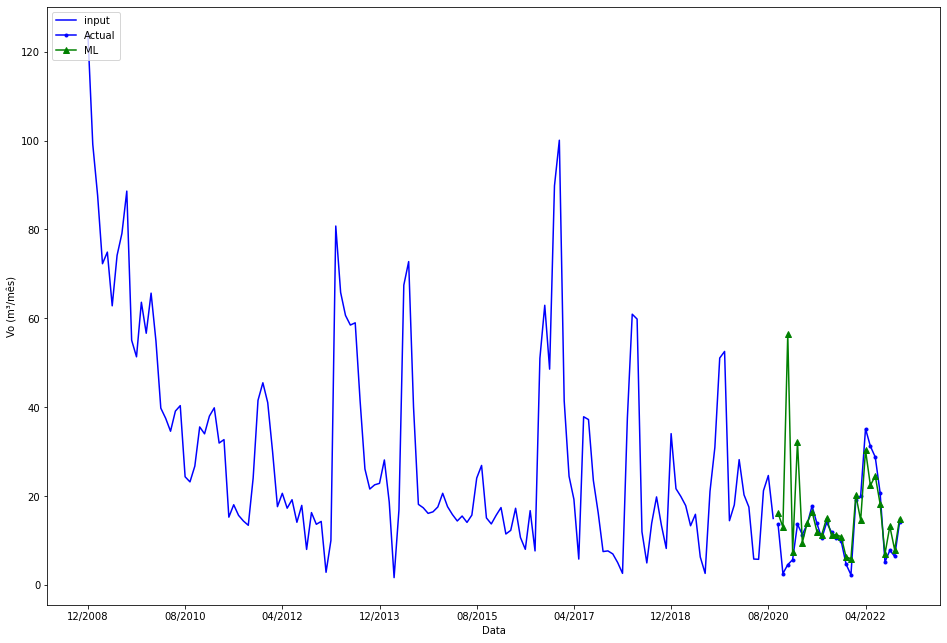

In [54]:
# visualizando graficamente o resultado
import matplotlib.ticker as plticker


fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(X_tr['Vo(t-0)'], 'b-', label='input')
ax.plot(X_ts['Vo(t-0)'], marker='.', color='blue', label='Actual')
ax.plot(X_ts.index, pd.DataFrame(preds)[0], marker='^', color='green', label='ML')
loc = plticker.MultipleLocator(base=20)
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Data')
ax.set_ylabel('Vo (m³/mês)')
plt.legend(loc=2);

## Ajuste de hiperparâmetros

Por questões de tempo e esforço computacional, o ajuste de hiperparâmetros foi realizado apenas para 1 poço (1FP2), e os melhores parâmetros replicados para todos os poços. Idealmente, o ajuste deveria ser feito para todos os poços dentro de um loop, como o que é usado para fazer as previsões.

In [55]:
from sklearn.model_selection import RandomizedSearchCV
# Number of alpha
alpha = [(x) for x in np.linspace(start = 0, stop = 0.2, num = 2000)]

# Create the random grid
random_grid = {'alpha': alpha}
print(random_grid)


{'alpha': [0.0, 0.00010005002501250626, 0.00020010005002501252, 0.0003001500750375188, 0.00040020010005002504, 0.0005002501250625313, 0.0006003001500750376, 0.0007003501750875438, 0.0008004002001000501, 0.0009004502251125563, 0.0010005002501250627, 0.0011005502751375688, 0.0012006003001500752, 0.0013006503251625813, 0.0014007003501750877, 0.0015007503751875938, 0.0016008004002001002, 0.0017008504252126065, 0.0018009004502251126, 0.001900950475237619, 0.0020010005002501254, 0.0021010505252626313, 0.0022011005502751376, 0.002301150575287644, 0.0024012006003001503, 0.0025012506253126567, 0.0026013006503251626, 0.002701350675337669, 0.0028014007003501753, 0.0029014507253626817, 0.0030015007503751876, 0.003101550775387694, 0.0032016008004002003, 0.0033016508254127067, 0.003401700850425213, 0.003501750875437719, 0.0036018009004502253, 0.0037018509254627316, 0.003801900950475238, 0.003901950975487744, 0.004002001000500251, 0.004102051025512757, 0.0042021010505252625, 0.004302151075537769, 0.0

In [56]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rdg = Ridge()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rdg_random = RandomizedSearchCV(estimator = rdg, param_distributions = random_grid, n_iter = 500, cv = 3, verbose=2, random_state=50, n_jobs = -1)
# Fit the random search model
rdg_random.fit(X_tr, y_tr)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


RandomizedSearchCV(cv=3, estimator=Ridge(), n_iter=500, n_jobs=-1,
                   param_distributions={'alpha': [0.0, 0.00010005002501250626,
                                                  0.00020010005002501252,
                                                  0.0003001500750375188,
                                                  0.00040020010005002504,
                                                  0.0005002501250625313,
                                                  0.0006003001500750376,
                                                  0.0007003501750875438,
                                                  0.0008004002001000501,
                                                  0.0009004502251125563,
                                                  0.0010005002501250627,
                                                  0.0011005502751375688,
                                                  0.001200...
                                                  0.00150075

In [57]:
rdg_random.best_params_

{'alpha': 0.0005002501250625313}

In [58]:
def evaluate(model, test_features, test_labels):
    preds = model.predict(test_features)
    print('Model Performance')
    print('Mean Average Error: {:0.3f}.'.format(mae(y_ts, preds).round(3)))
    print('Root Mean Average Squared Error = {:0.3f}.'.format(mse(y_ts, preds, squared=False).round(3)))
    
base_model = Ridge()
base_model.fit(X_tr, y_tr)
base_accuracy = evaluate(base_model, X_ts, y_ts)

Model Performance
Mean Average Error: 8.062.
Root Mean Average Squared Error = 12.989.


In [59]:
best_random_rdg = rdg_random.best_estimator_
random_accuracy = evaluate(best_random_rdg, X_ts, y_ts)

Model Performance
Mean Average Error: 8.024.
Root Mean Average Squared Error = 13.375.


### Previsão para 1 poço

In [60]:
X_prev = X_ts.copy()

In [61]:
# Criando data set para fazer previsões

preds_test = np.copy(preds)

X_previsao = pd.DataFrame(data = [], columns = X_prev.columns)

# Novo ciclo - Foi utilizado como padrão para o próximo ciclo (previsão) um volume de injeção de vapor
# médio no campo, de 1300 t. 
volume_inj = 1300
Ciclo_novo = df_ARDL_concat['Ciclo de vapor(t+1)'].max() + 1
meses = 10

## Primeiro mês de previsão -----------

i = 0

#for i in range(n_lags):
dic = pd.DataFrame({'Vo(t-3)': [X_ts.iloc[-1, i+1]], 'Vo(t-2)': [X_ts.iloc[-1, i+2]],
                        'Vo(t-1)': [X_ts.iloc[-1, i+3]], 'Vo(t-0)': [pd.DataFrame(preds_test).iloc[-1, 0]],
                        'Vi (t/mês)(t-3)': [X_ts.iloc[-1, i+5]], 'Vi (t/mês)(t-2)': [X_ts.iloc[-1, i+6]],
                        'Vi (t/mês)(t-1)': [X_ts.iloc[-1, i+7]], 'Vi (t/mês)(t-0)': ['0'],
                        'Ciclo de vapor(t-3)': [X_ts.iloc[-1, i+9]], 'Ciclo de vapor(t-2)': [X_ts.iloc[-1, i+10]],
                        'Ciclo de vapor(t-1)': [X_ts.iloc[-1, i+11]], 'Ciclo de vapor(t-0)': [df_ARDL_concat['Ciclo de vapor(t+1)'].max()]})

dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=i+1)
dic.set_index(['Data'], inplace=True)

X_previsao2 = pd.concat([X_previsao, dic], ignore_index = False, axis = 0)

preds_new = best_random_rdg.predict(X_previsao2)

## Segundo mês de previsão -----------

i = i+1

#for i in range(n_lags):
dic = pd.DataFrame({'Vo(t-3)': [X_previsao2.iloc[-1, i]], 'Vo(t-2)': [X_previsao2.iloc[-1, i+1]],
                        'Vo(t-1)': [X_previsao2.iloc[-1, i+2]], 'Vo(t-0)': [preds_new[-i+1]],
                        'Vi (t/mês)(t-3)': [X_previsao2.iloc[-1, i+4]], 'Vi (t/mês)(t-2)': [X_previsao2.iloc[-1, i+5]],
                        'Vi (t/mês)(t-1)': [X_previsao2.iloc[-1, i+6]], 'Vi (t/mês)(t-0)': [volume_inj],
                        'Ciclo de vapor(t-3)': [X_previsao2.iloc[-1, i+8]], 'Ciclo de vapor(t-2)': [X_previsao2.iloc[-1, i+9]],
                        'Ciclo de vapor(t-1)': [X_previsao2.iloc[-1, i+10]], 'Ciclo de vapor(t-0)': [Ciclo_novo]})

dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=i+1)
dic.set_index(['Data'], inplace=True)

X_previsao2 = pd.concat([X_previsao2, dic], ignore_index = False, axis = 0)

preds_new = best_random_rdg.predict(X_previsao2)

preds_test = np.append([preds_test], [preds_new])

## Terceiro mês de previsão em diante -----------

k = 1
m = 1

while m <= meses:
    dic = pd.DataFrame({'Vo(t-3)': [X_previsao2.iloc[-1, k]], 'Vo(t-2)': [X_previsao2.iloc[-1, k+1]],
                            'Vo(t-1)': [X_previsao2.iloc[-1, k+2]], 'Vo(t-0)': [preds_new[-k]],
                            'Vi (t/mês)(t-3)': [X_previsao2.iloc[-1, k+4]], 'Vi (t/mês)(t-2)': [X_previsao2.iloc[-1, k+5]],
                            'Vi (t/mês)(t-1)': [X_previsao2.iloc[-1, k+6]], 'Vi (t/mês)(t-0)': ['0'],
                            'Ciclo de vapor(t-3)': [X_previsao2.iloc[-1, k+8]], 'Ciclo de vapor(t-2)': [X_previsao2.iloc[-1, k+9]],
                            'Ciclo de vapor(t-1)': [X_previsao2.iloc[-1, k+10]], 'Ciclo de vapor(t-0)': [Ciclo_novo]})

    dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=m+2)
    dic.set_index(['Data'], inplace=True)

    X_previsao2 = pd.concat([X_previsao2, dic], ignore_index = False, axis = 0)

    preds_new = best_random_rdg.predict(X_previsao2)

    preds_test = np.append([preds_test], [preds_new])
    
    m += 1


X_previsao2.index = pd.to_datetime(X_previsao2.index, format='%m/%Y').strftime('%m/%Y')
X_previsao2['Previsto'] = pd.DataFrame(preds_new, index = X_previsao2.index)

Total de óleo previsto em 1 ano de ciclo 413.617263100983 m³


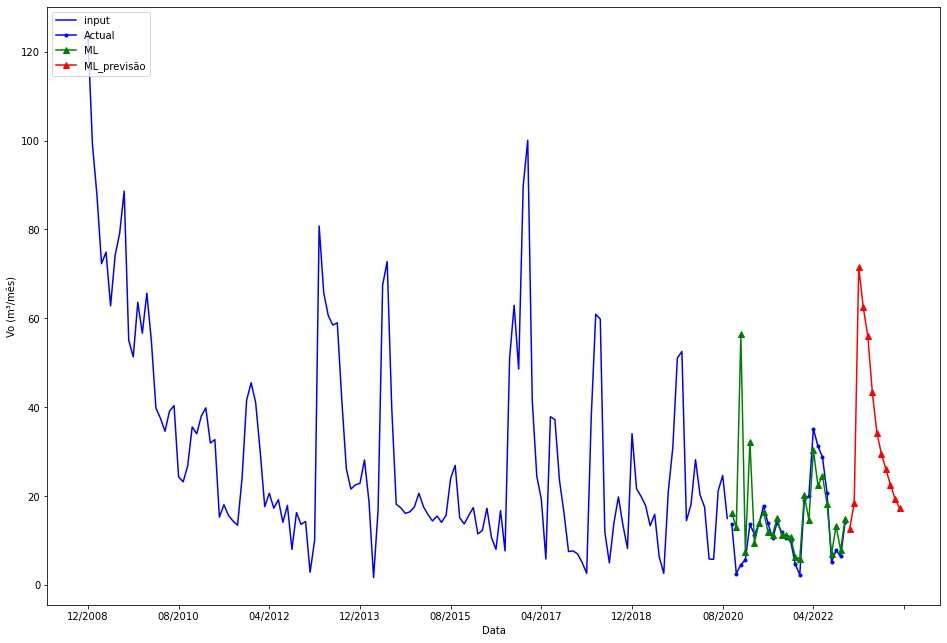

In [62]:
import matplotlib.ticker as plticker


fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(X_tr['Vo(t-0)'], 'b-', label='input')
ax.plot(X_ts['Vo(t-0)'], marker='.', color='blue', label='Actual')
#ax.plot(train['Data'], X_ts, marker='.', color='blue', label='Actual')
#ax.plot(X_test[5], marker='o', color='red', label='Baseline')
ax.plot(X_ts.index, pd.DataFrame(preds)[0], marker='^', color='green', label='ML')
ax.plot(X_previsao2.index, X_previsao2['Previsto'], marker='^', color='red', label='ML_previsão')

#ax.plot(X_ts.index, pd.DataFrame(preds_topf)[0], marker='^', color='green', label='ML')
#ax.plot(np.arange(26, 52, 1), gbr_seq_preds[1], marker='P', color='black', label='Gradient Boosting')
loc = plticker.MultipleLocator(base=20)
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Data')
ax.set_ylabel('Vo (m³/mês)')
plt.legend(loc=2);
#fig.autofmt_xdate()
#plt.tight_layout()

print('Total de óleo previsto em 1 ano de ciclo', X_previsao2['Previsto'].sum(), 'm³')

## Ajuste e previsão para todos os poços abertos (Ridge)

In [63]:
# Selecionando somente poços abertos na última data carregada
Open_wells = dfprod[pd.to_datetime(dfprod['Data']) == max(pd.to_datetime(dfprod.Data))][dfprod['Vo (m³/mês)'] > 0]['Poço'].unique()

df_open = dfprod[dfprod["Poço"].isin(Open_wells)]
df_open.groupby(['Poço', 'Ciclo de vapor']).max().describe()

Vo (m³/mês)    Np (Mm³)  vw (m³/mês)    Wp (Mm³)   Vi (t/mês)  \
count   557.000000  557.000000   557.000000  557.000000   557.000000   
mean    105.244533   12.992835  1605.855939  127.610481   987.582944   
std      88.517869   16.279276   986.966320  112.296462   514.947875   
min       0.257000    0.111000    13.610000    0.464000     0.000000   
25%      44.814000    3.365000   879.760000   37.092000   660.400000   
50%      85.459000    7.348000  1464.845000   91.188000   996.000000   
75%     137.952000   16.042000  2129.151000  195.061000  1321.900000   
max     576.030000  105.904000  5407.761000  533.965000  2920.300000   

         Vip (Mt)   Mês/ciclo  Vi/ciclo (t)  Vo/ciclo (m³)  \
count  557.000000  557.000000    557.000000     557.000000   
mean     3.553718   33.156194   1259.698923    1561.119912   
std      2.167719   30.451560    507.632305    1919.045327   
min      0.079000    0.000000     31.000000       0.257000   
25%      1.732000   14.000000    914.800000     399.238000   
50%      3.079000   25.000000   1246.600000     991.980000   
75%      5.052000   42.000000   1568.100000    1988.760000   
max     10.976000  233.000000   2939.700000   15266.132000   

       ROV acumulado/ciclo  
count           557.000000  
mean              1.644270  
std               3.234431  
min               0.000142  
25%               0.317366  
50%               0.812349  
75%               1.736895  
max              53.854968

##### Visualizando o ciclo atual de cada poço

In [64]:
df_res_atual = pd.DataFrame(data = [])

for w in df_open['Poço'].unique():
    dft = df_open[(df_open['Poço']==w)]
    
    dic = pd.DataFrame({'Poço': w, 'ROV atual': round(dft[dft['Ciclo de vapor']==dft['Ciclo de vapor'].max()]['ROV acumulado/ciclo'].max(), 3),
                            'Ciclo atual': dft['Ciclo de vapor'].max(), 'Meses do ciclo atual': dft[dft['Ciclo de vapor']==dft['Ciclo de vapor'].max()]['Mês/ciclo'].max(),
                            'Volume de óleo atual (m³/mês)': dft[pd.to_datetime(dft['Data']) == max(pd.to_datetime(dft.Data))]['Vo (m³/mês)'].values,
                       'Última cota injetada (t)': dft[dft['Ciclo de vapor']==dft['Ciclo de vapor'].max()]['Vi/ciclo (t)'].max()}
                      )
    
    df_res_atual = pd.concat([df_res_atual, dic], ignore_index = True, axis = 0)
    
df_res_atual

Poço  ROV atual  Ciclo atual  Meses do ciclo atual  \
0       1FP2      0.328            5                    25   
1       1FP3      1.540            5                    31   
2       4FP5      1.192            6                    38   
3      7FP12      1.390            2                    51   
4     7FP139      9.030            2                   233   
..       ...        ...          ...                   ...   
138  7FP443D      0.171            3                    12   
139  7FP464D      0.074            3                     7   
140  7FP441D      1.755            2                    45   
141   7FP469      0.556            5                    27   
142  7FP448D      1.982            1                    74   

     Volume de óleo atual (m³/mês)  Última cota injetada (t)  
0                           22.578                    1093.6  
1                           16.295                     652.7  
2                           11.392                    1420.0  
3                            9.043                    1819.3  
4                            6.816                     759.0  
..                             ...                       ...  
138                        158.168                    1822.5  
139                          3.707                     370.8  
140                         18.078                    1262.9  
141                         12.103                     961.5  
142                          8.102                    1728.8  

[143 rows x 6 columns]

### Poços com somente 1 ciclo de vapor até o momento: 
#### (não podem ser utilizados no modelo por insuficiência de dados para treino e teste)

In [65]:
df_res_atual[df_res_atual['Ciclo atual']==1]

Poço  ROV atual  Ciclo atual  Meses do ciclo atual  \
18     7FP22      1.311            1                    20   
53    7FP333      7.353            1                   172   
77    7FP384      0.850            1                   150   
81    7FP389      1.318            1                   146   
92    7FP411      6.151            1                   129   
111  7FP449D      0.583            1                    61   
114   7FP454      1.057            1                    27   
120   7FP468      2.656            1                    63   
122   7FP476      1.287            1                    72   
123   7FP479      0.558            1                    73   
124   7FP481      1.042            1                    72   
127   7FP485      0.482            1                    71   
142  7FP448D      1.982            1                    74   

     Volume de óleo atual (m³/mês)  Última cota injetada (t)  
18                          32.993                     326.2  
53                          22.541                    1045.2  
77                           2.789                    1705.5  
81                          14.735                    2321.1  
92                          89.356                    2479.2  
111                          2.624                    1345.3  
114                         25.746                     914.8  
120                          5.322                    1082.9  
122                         37.263                    1297.1  
123                         31.234                    1690.2  
124                         15.342                    1961.2  
127                         12.370                    1314.6  
142                          8.102                    1728.8

In [66]:
import warnings
warnings.filterwarnings("ignore")

df_sem_dados = pd.DataFrame(data = [])
df_open_min_ciclos = df_open[df_open["Poço"].isin(df_res_atual[df_res_atual['Ciclo atual']>1].Poço)]
X_previsao_all = pd.DataFrame(data = [])

df_errors = pd.DataFrame(data = [])
for w in df_open_min_ciclos['Poço'].unique():

    # Treinamento do modelo
    
    df_ARDL = dfprod[dfprod['Poço'] == w].reset_index()

    df_ARDL = df_ARDL[['Data', 'Vo (m³/mês)', 'Vi (t/mês)', 'Ciclo de vapor']]

    df_ARDL = df_ARDL.rename(columns={"Vo (m³/mês)": "Vo"})

    df_ARDL.set_index('Data', inplace=True)
    
    # create data set with lagged features using time delay embedding
    n_lags = 4

    df_ARDL_delay = []
    for col in df_ARDL:
        col_df = time_delay_embedding(df_ARDL[col], n_lags=n_lags, horizon=1)
        df_ARDL_delay.append(col_df)
    
    # concatenating all variables
    df_ARDL_concat = pd.concat(df_ARDL_delay, axis=1).dropna()
    
    # train/test split
    # Selecionando para treino dados onde o ciclo de vapor é diferente do maior ciclo
    train = df_ARDL_concat[df_ARDL_concat['Ciclo de vapor(t+1)'] != df_ARDL_concat['Ciclo de vapor(t+1)'].max()]
    
    # Verificando se existe quantidade de dados suficientes para treino
    
    if len(train.index) >= 12:
        # Selecionando para teste dados onde o ciclo de vapor é o maior ciclo
        test = df_ARDL_concat[df_ARDL_concat['Ciclo de vapor(t+1)'] == df_ARDL_concat['Ciclo de vapor(t+1)'].max()]

        predictor_variables = df_ARDL_concat.columns.str.contains('\(t\-')
        target_variables = df_ARDL_concat.columns.str.contains('Vo\(t\+')

        X_tr = train.iloc[:, predictor_variables]
        y_tr = train.iloc[:, target_variables]

        X_ts = test.iloc[:, predictor_variables]
        y_ts = test.iloc[:, target_variables]

        # fitting a RF model
        model = RandomForestRegressor(n_estimators=8)
        model.fit(X_tr, y_tr)

        # getting forecasts for the test set
        preds = model.predict(X_ts)

        # computing MAE error
        dic = pd.DataFrame({'Poço': w, 'mae': mae(y_ts, preds).round(3), 'rmse': mse(y_ts, preds, squared=False).round(3)}, index=[0])
        df_errors = pd.concat([df_errors, dic], axis = 0)
        
        # Previsão
        
        X_prev = X_ts.copy()
        
        # Criando data set para fazer previsões

        preds_test = np.copy(preds)

        X_previsao = pd.DataFrame(data = [], columns = X_prev.columns)

        ## Novo ciclo -------------------------------------------
        volume_inj = 1300
        Ciclo_novo = df_ARDL_concat['Ciclo de vapor(t+1)'].max() + 1
        meses = 10

        ## Primeiro mês de previsão -----------

        i = 0

        #for i in range(n_lags):
        dic = pd.DataFrame({'Vo(t-3)': [X_ts.iloc[-1, i+1]], 'Vo(t-2)': [X_ts.iloc[-1, i+2]],
                                'Vo(t-1)': [X_ts.iloc[-1, i+3]], 'Vo(t-0)': [pd.DataFrame(preds_test).iloc[-1, 0]],
                                'Vi (t/mês)(t-3)': [X_ts.iloc[-1, i+5]], 'Vi (t/mês)(t-2)': [X_ts.iloc[-1, i+6]],
                                'Vi (t/mês)(t-1)': [X_ts.iloc[-1, i+7]], 'Vi (t/mês)(t-0)': ['0'],
                                'Ciclo de vapor(t-3)': [X_ts.iloc[-1, i+9]], 'Ciclo de vapor(t-2)': [X_ts.iloc[-1, i+10]],
                                'Ciclo de vapor(t-1)': [X_ts.iloc[-1, i+11]], 'Ciclo de vapor(t-0)': [df_ARDL_concat['Ciclo de vapor(t+1)'].max()]})

        dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=i+1)
        dic.set_index(['Data'], inplace=True)

        X_previsao2 = pd.concat([X_previsao, dic], ignore_index = False, axis = 0)

        preds_new = model.predict(X_previsao2)

        ## Segundo mês de previsão -----------

        i = i+1

        #for i in range(n_lags):
        dic = pd.DataFrame({'Vo(t-3)': [X_previsao2.iloc[-1, i]], 'Vo(t-2)': [X_previsao2.iloc[-1, i+1]],
                                'Vo(t-1)': [X_previsao2.iloc[-1, i+2]], 'Vo(t-0)': [preds_new[-i+1]],
                                'Vi (t/mês)(t-3)': [X_previsao2.iloc[-1, i+4]], 'Vi (t/mês)(t-2)': [X_previsao2.iloc[-1, i+5]],
                                'Vi (t/mês)(t-1)': [X_previsao2.iloc[-1, i+6]], 'Vi (t/mês)(t-0)': [volume_inj],
                                'Ciclo de vapor(t-3)': [X_previsao2.iloc[-1, i+8]], 'Ciclo de vapor(t-2)': [X_previsao2.iloc[-1, i+9]],
                                'Ciclo de vapor(t-1)': [X_previsao2.iloc[-1, i+10]], 'Ciclo de vapor(t-0)': [Ciclo_novo]})

        dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=i+1)
        dic.set_index(['Data'], inplace=True)

        X_previsao2 = pd.concat([X_previsao2, dic], ignore_index = False, axis = 0)

        preds_new = model.predict(X_previsao2)

        preds_test = np.append([preds_test], [preds_new])

        ## Terceiro mês de previsão em diante -----------

        k = 1
        m = 1

        while m <= meses:
            dic = pd.DataFrame({'Vo(t-3)': [X_previsao2.iloc[-1, k]], 'Vo(t-2)': [X_previsao2.iloc[-1, k+1]],
                                    'Vo(t-1)': [X_previsao2.iloc[-1, k+2]], 'Vo(t-0)': [preds_new[-k]],
                                    'Vi (t/mês)(t-3)': [X_previsao2.iloc[-1, k+4]], 'Vi (t/mês)(t-2)': [X_previsao2.iloc[-1, k+5]],
                                    'Vi (t/mês)(t-1)': [X_previsao2.iloc[-1, k+6]], 'Vi (t/mês)(t-0)': ['0'],
                                    'Ciclo de vapor(t-3)': [X_previsao2.iloc[-1, k+8]], 'Ciclo de vapor(t-2)': [X_previsao2.iloc[-1, k+9]],
                                    'Ciclo de vapor(t-1)': [X_previsao2.iloc[-1, k+10]], 'Ciclo de vapor(t-0)': [Ciclo_novo]})

            dic['Data'] = pd.to_datetime(X_prev.index[-1]) + pd.DateOffset(months=m+2)
            dic.set_index(['Data'], inplace=True)

            X_previsao2 = pd.concat([X_previsao2, dic], ignore_index = False, axis = 0)

            preds_new = model.predict(X_previsao2)

            preds_test = np.append([preds_test], [preds_new])

            m += 1


        X_previsao2.index = pd.to_datetime(X_previsao2.index, format='%m/%Y').strftime('%m/%Y')
        X_previsao2['Previsto'] = pd.DataFrame(preds_new, index = X_previsao2.index)
        X_previsao2['Poço'] = w
        
        X_previsao_all = pd.concat([X_previsao_all, X_previsao2], ignore_index = False, axis = 0)     
        
        
    else:
        dic2 = pd.DataFrame({'Poço': w}, index=[0])
        df_sem_dados = pd.concat([df_sem_dados, dic2], ignore_index = True, axis = 0)
        continue

print("Resumo: ") 
print("Poços treinados: ", np.count_nonzero(X_previsao_all['Poço'].unique()))
print("Poços com dados insuficientes por ciclos muito curtos: ", np.count_nonzero(df_sem_dados))
print("Poços com dados insuficientes por só terem realizado 1 ciclo: ", np.count_nonzero(df_res_atual[df_res_atual['Ciclo atual']==1]['Poço'].unique()))
print("Erro médio (mae): ", round(df_errors.mae.mean(), 3))
print("Erro médio (rmse): ", round(df_errors.rmse.mean(), 3))
      
      
    


Resumo: 
Poços treinados:  126
Poços com dados insuficientes por ciclos muito curtos:  4
Poços com dados insuficientes por só terem realizado 1 ciclo:  13
Erro médio (mae):  16.497
Erro médio (rmse):  20.689


In [67]:
# Erros durante treinamento (rmse)
df_errors.reset_index()
import plotly.express as px

fig = px.scatter(df_errors,
            x=range(1,len(df_errors)+1), y='rmse',
            hover_data=['Poço'])

fig.show()

df_errors.describe()

mae        rmse
count  126.000000  126.000000
mean    16.497421   20.688635
std     10.496781   13.010622
min      1.536000    2.126000
25%      8.741000   10.401250
50%     14.139000   18.172000
75%     21.997000   26.550750
max     51.142000   59.475000

## Modelo 3 - KNN Regressor

### Ajuste do modelo para 1 poço

In [68]:
# Configurando ARDL
well = "1FP2"

df_ARDL = df_full[df_full['Poço'] == well].reset_index()

df_ARDL = df_ARDL[['Data', 'Vo (m³/mês)', 'Vi (t/mês)', 'Ciclo de vapor']]

df_ARDL = df_ARDL.rename(columns={"Vo (m³/mês)": "Vo"})

df_ARDL.set_index('Data', inplace=True)

n_lags = 4

df_ARDL_delay = []
for col in df_ARDL:
    col_df = time_delay_embedding(df_ARDL[col], n_lags=n_lags, horizon=1)
    df_ARDL_delay.append(col_df)

df_ARDL_concat = pd.concat(df_ARDL_delay, axis=1).dropna()

In [69]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler


# train/test split
# Selecionando para treino dados onde o ciclo de vapor é diferente do maior ciclo
train = df_ARDL_concat[df_ARDL_concat['Ciclo de vapor(t+1)'] != df_ARDL_concat['Ciclo de vapor(t+1)'].max()]

# Selecionando para teste dados onde o ciclo de vapor é o maior ciclo
test = df_ARDL_concat[df_ARDL_concat['Ciclo de vapor(t+1)'] == df_ARDL_concat['Ciclo de vapor(t+1)'].max()]

predictor_variables = df_ARDL_concat.columns.str.contains('\(t\-')
target_variables = df_ARDL_concat.columns.str.contains('Vo\(t\+')

X_tr = train.iloc[:, predictor_variables]
y_tr = train.iloc[:, target_variables]

X_ts = test.iloc[:, predictor_variables]
y_ts = test.iloc[:, target_variables]


scaler = MinMaxScaler()

X_tr_minmax=scaler.fit_transform(X_tr)
X_ts_minmax=scaler.fit_transform(X_ts)

model = KNeighborsRegressor() # KNN Regressor

model.fit(X_tr_minmax, y_tr)

# fazendo previsão para os dados de teste
preds = model.predict(X_ts_minmax)

# computando o MAE
print('Mean Average Error: {:0.3f}.'.format(mae(y_ts, preds).round(3)))
# computando o RMSE
print('Root Mean Average Squared Error = {:0.3f}.'.format(mse(y_ts, preds, squared=False).round(3)))

Mean Average Error: 16.965.
Root Mean Average Squared Error = 23.524.


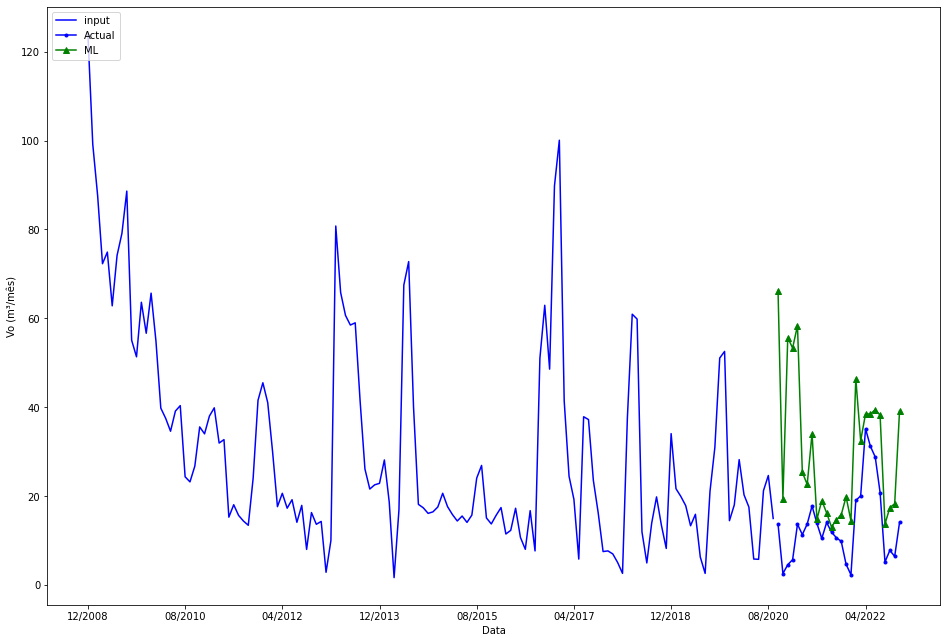

In [70]:
# visualizando graficamente o resultado
import matplotlib.ticker as plticker

    
fig, ax = plt.subplots(figsize=(16, 11))
ax.plot(X_tr['Vo(t-0)'], 'b-', label='input')
ax.plot(X_ts['Vo(t-0)'], marker='.', color='blue', label='Actual')
ax.plot(X_ts.index, pd.DataFrame(preds)[0], marker='^', color='green', label='ML')
loc = plticker.MultipleLocator(base=20)
ax.xaxis.set_major_locator(loc)
ax.set_xlabel('Data')
ax.set_ylabel('Vo (m³/mês)')
plt.legend(loc=2);

## Ajuste de hiperparâmetros

Por questões de tempo e esforço computacional, o ajuste de hiperparâmetros foi realizado apenas para 1 poço (1FP2), e os melhores parâmetros replicados para todos os poços. Idealmente, o ajuste deveria ser feito para todos os poços dentro de um loop, como o que é usado para fazer as previsões.

In [71]:
from sklearn.model_selection import RandomizedSearchCV
# Number of neighbors
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
# Weight function
weights = ['uniform', 'distance']
# metric
metric = ['str', 'callable', 'minkowski']
# Create the random grid
random_grid = {'n_neighbors': n_neighbors,
               'weights': weights,
               'metric': metric}
print(random_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'weights': ['uniform', 'distance'], 'metric': ['str', 'callable', 'minkowski']}


In [72]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
kn = KNeighborsRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
kn_random = RandomizedSearchCV(estimator = kn, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=50, n_jobs = -1)
# Fit the random search model
kn_random.fit(X_tr_minmax, y_tr)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=200, n_jobs=-1,
                   param_distributions={'metric': ['str', 'callable',
                                                   'minkowski'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10, 11, 12, 13, 14,
                                                        15, 16, 17, 18, 19,
                                                        20],
                                        'weights': ['uniform', 'distance']},
                   random_state=50, verbose=2)

In [73]:
kn_random.best_params_

{'weights': 'uniform', 'n_neighbors': 2, 'metric': 'minkowski'}

In [74]:
def evaluate(model, test_features, test_labels):
    preds = model.predict(test_features)
    print('Model Performance')
    print('Mean Average Error: {:0.3f}.'.format(mae(y_ts, preds).round(3)))
    print('Root Mean Average Squared Error = {:0.3f}.'.format(mse(y_ts, preds, squared=False).round(3)))
    
base_model = KNeighborsRegressor()
base_model.fit(X_tr_minmax, y_tr)
base_accuracy = evaluate(base_model, X_ts_minmax, y_ts)

Model Performance
Mean Average Error: 16.965.
Root Mean Average Squared Error = 23.524.


In [75]:
best_random = kn_random.best_estimator_
random_accuracy = evaluate(best_random, X_ts_minmax, y_ts)

Model Performance
Mean Average Error: 18.191.
Root Mean Average Squared Error = 27.327.


Como o modelo apresentou erros (mae e rmse) muito superiores aos dois anteriormente utilizados, e mesmo com o ajuste de hiperparâmetros, não foi possível reduzir esses erros, optou-se por não seguir para a etapa de previsão com esse algoritmo.

# Resultados

Foi utilizado o modelo com o algoritmo Random Forest, que apresentou menores erros médios quando considerados todos os poços.

### Tabela final contendo poços treinados e não treinados

In [76]:
# Calculando ROV após previsão
X_resultado = X_previsao_all_rf.groupby(['Poço']).sum()
X_resultado = X_resultado.rename(columns={"Previsto" : "Óleo previsto próximo ciclo - 1 ano (m³)"})
X_resultado["ROV esperado - 1 ano"] = 0

for i in range(len(X_resultado)):
    X_resultado.iloc[i, 1] = X_resultado.iloc[i, 0] / volume_inj
    
X_resultado.reset_index(inplace=True)

In [77]:
df_final = df_res_atual.join(X_resultado.set_index('Poço'), on='Poço')
df_final

Poço  ROV atual  Ciclo atual  Meses do ciclo atual  \
0       1FP2      0.328            5                    25   
1       1FP3      1.540            5                    31   
2       4FP5      1.192            6                    38   
3      7FP12      1.390            2                    51   
4     7FP139      9.030            2                   233   
..       ...        ...          ...                   ...   
138  7FP443D      0.171            3                    12   
139  7FP464D      0.074            3                     7   
140  7FP441D      1.755            2                    45   
141   7FP469      0.556            5                    27   
142  7FP448D      1.982            1                    74   

     Volume de óleo atual (m³/mês)  Última cota injetada (t)  \
0                           22.578                    1093.6   
1                           16.295                     652.7   
2                           11.392                    1420.0   
3                            9.043                    1819.3   
4                            6.816                     759.0   
..                             ...                       ...   
138                        158.168                    1822.5   
139                          3.707                     370.8   
140                         18.078                    1262.9   
141                         12.103                     961.5   
142                          8.102                    1728.8   

     Óleo previsto próximo ciclo - 1 ano (m³)  ROV esperado - 1 ano  
0                                  318.056831              0.244659  
1                                  203.088532              0.156222  
2                                  430.821604              0.331401  
3                                  146.585711              0.112758  
4                                         NaN                   NaN  
..                                        ...                   ...  
138                                188.118414              0.144706  
139                                420.850543              0.323731  
140                                 53.534308              0.041180  
141                                382.934671              0.294565  
142                                       NaN                   NaN  

[143 rows x 8 columns]

### Ranking dos 10 primeiros poços pelos ROV esperado do próximo ciclo

In [78]:
df_final.sort_values(by=['ROV esperado - 1 ano'], ascending=False).head(10)

Poço  ROV atual  Ciclo atual  Meses do ciclo atual  \
36  7FP291A      0.077            6                    12   
98   7FP424      3.121            4                    19   
33   7FP277      4.424            3                    49   
29   7FP269      7.325            6                    99   
40   7FP305      1.167            4                    15   
90    7FP39      0.606            4                    45   
50   7FP324      2.218            5                    29   
95  7FP417D      0.809            3                    45   
44   7FP312      0.384            5                    16   
96   7FP421      0.865            4                    42   

    Volume de óleo atual (m³/mês)  Última cota injetada (t)  \
36                          1.724                    1071.3   
98                         48.320                     448.0   
33                         19.505                     919.3   
29                         15.853                     882.0   
40                         18.318                    1095.7   
90                         32.396                    1465.8   
50                          2.172                     946.6   
95                         23.727                    2250.8   
44                         16.803                    1420.0   
96                         31.298                    2074.4   

    Óleo previsto próximo ciclo - 1 ano (m³)  ROV esperado - 1 ano  
36                               1565.965535              1.204589  
98                               1489.932580              1.146102  
33                               1329.605095              1.022773  
29                               1169.796031              0.899843  
40                               1086.544698              0.835804  
90                               1052.639631              0.809723  
50                               1031.118222              0.793168  
95                                961.308234              0.739468  
44                                951.988967              0.732299  
96                                928.794836              0.714458

In [79]:
import plotly.express as px

fig = px.scatter(df_final,
            x=df_final['ROV esperado - 1 ano'],
            y=df_final['Volume de óleo atual (m³/mês)'],
                 hover_data=['Poço', 'Meses do ciclo atual', 'Última cota injetada (t)'], color="Ciclo atual",
                )

fig.show()

In [80]:
df_coordenadas = df_full.groupby(['Poço']).max()[['Latitude', 'Longitude']]
df_final_plot = df_coordenadas.join(df_final.set_index('Poço'), on='Poço')
df_final_plot = df_final_plot.reset_index()
df_final_plot

Poço  Latitude  Longitude  ROV atual  Ciclo atual  \
0      1FP2 -5.245875 -36.531490      0.328            5   
1      1FP3 -5.265191 -36.572166      1.540            5   
2      4FP5 -5.259393 -36.557922      1.192            6   
3     7FP12 -5.261572 -36.572206      1.390            2   
4    7FP139 -5.259689 -36.562700      9.030            2   
..      ...       ...        ...        ...          ...   
138   7FP83 -5.263369 -36.573996      0.374            6   
139   7FP84 -5.248027 -36.540395      0.197            6   
140   7FP85 -5.234879 -36.511657      0.105            2   
141   7FP88 -5.260220 -36.560324      0.263            4   
142    7FP9 -5.265178 -36.568559      1.656            4   

     Meses do ciclo atual  Volume de óleo atual (m³/mês)  \
0                      25                         22.578   
1                      31                         16.295   
2                      38                         11.392   
3                      51                          9.043   
4                     233                          6.816   
..                    ...                            ...   
138                    21                          3.920   
139                    11                          8.341   
140                    21                          6.062   
141                    21                         10.009   
142                    53                         26.408   

     Última cota injetada (t)  Óleo previsto próximo ciclo - 1 ano (m³)  \
0                      1093.6                                318.056831   
1                       652.7                                203.088532   
2                      1420.0                                430.821604   
3                      1819.3                                146.585711   
4                       759.0                                       NaN   
..                        ...                                       ...   
138                     558.4                                288.033760   
139                     847.4                                330.400047   
140                     893.3                                764.253379   
141                     932.0                                133.265751   
142                    1921.9                                584.969880   

     ROV esperado - 1 ano  
0                0.244659  
1                0.156222  
2                0.331401  
3                0.112758  
4                     NaN  
..                    ...  
138              0.221564  
139              0.254154  
140              0.587887  
141              0.102512  
142              0.449977  

[143 rows x 10 columns]

In [81]:
fig = px.scatter(df_final_plot.dropna(), x='Latitude', y='Longitude', hover_data=['Poço', 'Meses do ciclo atual',
                                                                                  'Última cota injetada (t)'], 
                size="ROV esperado - 1 ano",
                color="Ciclo atual")
fig.show()